In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import warnings; warnings.filterwarnings(action='ignore')

# load datasets
from sklearn import datasets

# model_selection.splitter
from sklearn.model_selection import train_test_split       # function

# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold # cross-validator
from sklearn.model_selection import cross_val_score

# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV

# models/estimators
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# models : boost
import xgboost as xgb
import lightgbm

# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # pd.get_dummies()

# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve

# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report

# mymodule
# from mymodule import check_nan, encode, mapping, split_xy
# from mymodule import pr_curve, ra_curve, my_eval, max_eval, split_fit_score

In [2]:
# read

In [3]:
# https://www.kaggle.com/mlg-ulb/creditcardfraud
df = pd.read_csv('./kaggle/credit_card_fraud/creditcard.csv')
# df = pd.read_csv('/content/drive/MyDrive/venv/_pkg/kaggle/credit_card_fraud/creditcard.csv')

In [4]:
# check

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# import pandas_profiling as pp
# report = df.profile_report()
# report.to_file("./creditcard_eda.html")

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.isna().sum().sum()

0

In [9]:
X, y = split_xy(df, 'Class')
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

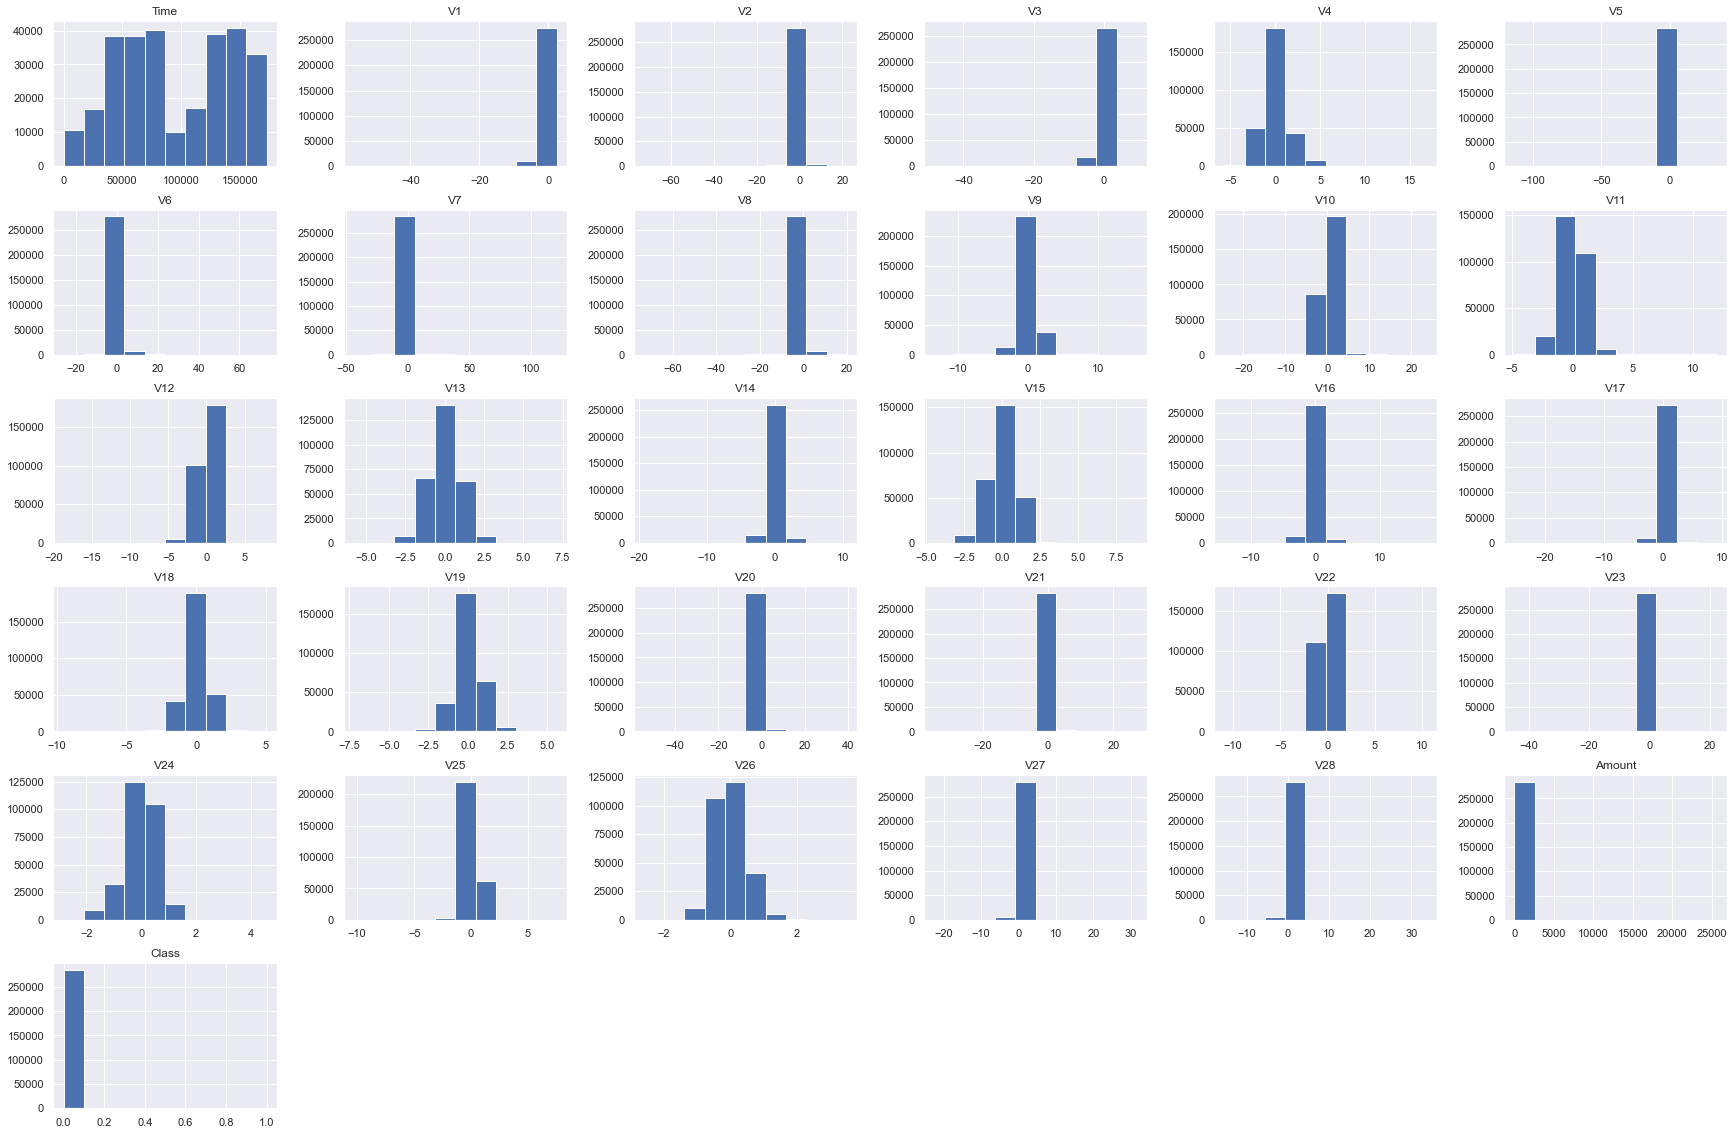

In [11]:
df.hist(figsize=(30, 20))
plt.show()

In [12]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [13]:
# time : datetime

In [14]:
# time을 연월일로 변환 : second(초) 가정
# df['Time']
def trans_time(x):
    day  = x // 86400
    hour = (x % 86400) // 3600
    min  = ((x % 86400) % 3600) // 60
    sec  = ((x % 86400) % 3600) % 60

In [15]:
df.Time.describe()

count    284807.000000
mean      94813.859575
std       47488.145955
min           0.000000
25%       54201.500000
50%       84692.000000
75%      139320.500000
max      172792.000000
Name: Time, dtype: float64

In [16]:
# str_date = '2021-08-07 12:23:24'
# todate = pd.to_datetime(str_date)
# # print(todate)

# from datetime import datetime as dtime

# df['tt'] = pd.to_datetime(df['Time'])

# dtime.year()


In [17]:
# dist : 0 시간, 1 시간

In [18]:
# sns.set_theme(style="darkgrid")
# sns.displot(df[['Time', 'Class']], x="Time")

In [19]:
pdf = df[df['Class'] ==1]
ndf = df[df['Class'] ==0]

# sns.displot(pdf, x='Time', hue='Class', kind='hist', ax=axes[0])
# sns.displot(ndf, x='Time', hue='Class', kind='hist', ax=axes[1])

# fig, axes = plt.subplots(1,2,figsize=(20,5))
# sns.distplot(ndf['company_size'], label="0" ,ax=axes[0])
# sns.distplot(pdf['company_size'], label="1" ,ax=axes[0])
# axes[0].legend()

In [20]:
# scatter

In [21]:
# ax = sns.lmplot(y="Amount", x="Time", fit_reg=False, aspect=1.8, data=df, hue='Class')
# plt.title("city_development_index by city of Frauds and Normal", fontsize=16)
# plt.show()
# 시간대로 사기를 잡기 어려움

In [22]:
# amount

In [23]:
df['Amount'].head()

0    149.62
1      2.69
2    378.66
3    123.50
4     69.99
Name: Amount, dtype: float64

<AxesSubplot:>

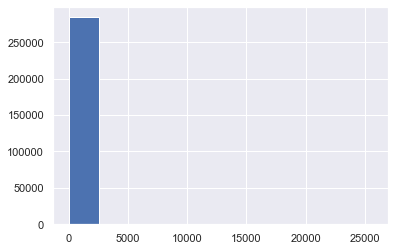

In [24]:
df.Amount.hist()

In [25]:
df['Amount'].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

In [26]:
df = pd.read_csv('./kaggle/credit_card_fraud/creditcard_sample.csv')

In [27]:
# print(df['city'].value_counts().describe())
# f,ax=plt.subplots(figsize=(10,4))
# sns.boxplot(x=df['Amount'].value_counts())
# sns.swarmplot(x=df['Amount'].value_counts())

In [28]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]

for sc in scalers:
    
    sc.fit(X_train['Amount'].values.reshape(-1, 1))

    train_sc = sc.transform(X_train['Amount'].values.reshape(-1, 1)) # 가로로 긴 형태 arr return, 세로로 긴 형태로 바꾸어 줘야 함
    test_sc  = sc.transform(X_test['Amount'].values.reshape(-1, 1))
    
    X_train['Amount_' + sc.__class__.__name__[:3]] = train_sc.reshape(-1, 1)
    X_test['Amount_' + sc.__class__.__name__[:3]]  = test_sc.reshape(-1, 1)

In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45569 entries, 31486 to 2732
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        45569 non-null  float64
 1   V1          45569 non-null  float64
 2   V2          45569 non-null  float64
 3   V3          45569 non-null  float64
 4   V4          45569 non-null  float64
 5   V5          45569 non-null  float64
 6   V6          45569 non-null  float64
 7   V7          45569 non-null  float64
 8   V8          45569 non-null  float64
 9   V9          45569 non-null  float64
 10  V10         45569 non-null  float64
 11  V11         45569 non-null  float64
 12  V12         45569 non-null  float64
 13  V13         45569 non-null  float64
 14  V14         45569 non-null  float64
 15  V15         45569 non-null  float64
 16  V16         45569 non-null  float64
 17  V17         45569 non-null  float64
 18  V18         45569 non-null  float64
 19  V19         45569 non-

In [30]:
# 스케일 하나씩 분리해서 학습시켜보기

In [31]:
X = X_train.append(X_test)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56962 entries, 31486 to 17199
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        56962 non-null  float64
 1   V1          56962 non-null  float64
 2   V2          56962 non-null  float64
 3   V3          56962 non-null  float64
 4   V4          56962 non-null  float64
 5   V5          56962 non-null  float64
 6   V6          56962 non-null  float64
 7   V7          56962 non-null  float64
 8   V8          56962 non-null  float64
 9   V9          56962 non-null  float64
 10  V10         56962 non-null  float64
 11  V11         56962 non-null  float64
 12  V12         56962 non-null  float64
 13  V13         56962 non-null  float64
 14  V14         56962 non-null  float64
 15  V15         56962 non-null  float64
 16  V16         56962 non-null  float64
 17  V17         56962 non-null  float64
 18  V18         56962 non-null  float64
 19  V19         56962 non

In [32]:
X1 = X.drop(['Amount', 'Amount_Sta', 'Amount_Min'], axis=1)
X2 = X.drop(['Amount', 'Amount_Min', 'Amount_Rob'], axis=1)
X3 = X.drop(['Amount', 'Amount_Rob', 'Amount_Sta'], axis=1)

In [33]:
X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56962 entries, 31486 to 17199
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        56962 non-null  float64
 1   V1          56962 non-null  float64
 2   V2          56962 non-null  float64
 3   V3          56962 non-null  float64
 4   V4          56962 non-null  float64
 5   V5          56962 non-null  float64
 6   V6          56962 non-null  float64
 7   V7          56962 non-null  float64
 8   V8          56962 non-null  float64
 9   V9          56962 non-null  float64
 10  V10         56962 non-null  float64
 11  V11         56962 non-null  float64
 12  V12         56962 non-null  float64
 13  V13         56962 non-null  float64
 14  V14         56962 non-null  float64
 15  V15         56962 non-null  float64
 16  V16         56962 non-null  float64
 17  V17         56962 non-null  float64
 18  V18         56962 non-null  float64
 19  V19         56962 non

In [38]:
model = RandomForestClassifier(random_state=0)
split_fit_score(X1, y, model)

KeyboardInterrupt: 

In [ ]:
model = RandomForestClassifier(random_state=0)
split_fit_score(X2, y, model)

In [ ]:
model = RandomForestClassifier(random_state=0)
split_fit_score(X3, y, model)